In [71]:
# ==============================================================================
# KODE PYTHON UNTUK BAGIAN 4: DATA UNDERSTANDING
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings

warnings.filterwarnings('ignore') # Untuk menekan peringatan plot

# --- Konfigurasi ---
N_FEATURES = 1558
column_names = [f'F{i}' for i in range(N_FEATURES)] + ['target']
continuous_features = [f'F{i}' for i in range(3)] # F0 (height), F1 (width), F2 (aratio)
binary_features = [f'F{i}' for i in range(3, N_FEATURES)]

# 1. MEMUAT DATA
try:
    df = pd.read_csv(
        'ad.data',
        header=None,
        names=column_names,
        na_values='?',
        skipinitialspace=True,
        sep=','
    )
except Exception as e:
    # Mengasumsikan pemisah spasi jika koma gagal
    df = pd.read_csv(
        'ad.data',
        header=None,
        names=column_names,
        na_values='?',
        skipinitialspace=True,
        sep=' '
    )

# Pembersihan Target untuk analisis dan visualisasi
df['target_clean'] = df['target'].str.replace('.', '', regex=False).str.strip()


# ==============================================================================
# 4.3 KONDISI DATA (Inspeksi Awal - Output Teks)
# ==============================================================================
print("--- 4.3 KONDISI DATA (Inspeksi Awal) ---")
print(f"Jumlah Total Baris: {len(df)}")
print(f"Jumlah Total Kolom: {len(df.columns) - 2} (Fitur) + 1 (Target Asli) + 1 (Target Bersih)")

# Missing Values
print("\nMissing Values di Fitur Kontinu (F0, F1, F2):")
print(df[continuous_features].isnull().sum())
print(f"Total Missing Values di seluruh DataFrame: {df.isnull().sum().sum()}")


# Class Distribution (Imbalanced Data Check)
class_counts = df['target_clean'].value_counts()
print("\nDistribusi Kelas Target:")
print(class_counts)
print(f"Rasio Nonad/Ad: {class_counts['nonad'] / class_counts['ad']:.2f} (Sangat Tidak Seimbang)")



--- 4.3 KONDISI DATA (Inspeksi Awal) ---
Jumlah Total Baris: 3279
Jumlah Total Kolom: 1558 (Fitur) + 1 (Target Asli) + 1 (Target Bersih)

Missing Values di Fitur Kontinu (F0, F1, F2):
F0    903
F1    901
F2    910
dtype: int64
Total Missing Values di seluruh DataFrame: 2729

Distribusi Kelas Target:
target_clean
nonad    2820
ad        459
Name: count, dtype: int64
Rasio Nonad/Ad: 6.14 (Sangat Tidak Seimbang)


### Missing Values

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [72]:
missing_values_count = df.isnull().sum()
missing_values_percent = 100 * df.isnull().sum() / len(df)

missing_values_df = pd.DataFrame({
    'Jumlah Nilai Hilang': missing_values_count,
    'Persentase Nilai Hilang': missing_values_percent
})

missing_values_df = missing_values_df[missing_values_df['Jumlah Nilai Hilang'] > 0].sort_values(by='Jumlah Nilai Hilang', ascending=False)

print("\n--- Jumlah dan Persentase Nilai Hilang per Kolom ---")
print(missing_values_df)

total_missing_count = df.isnull().sum().sum()
total_cells = df.shape[0] * df.shape[1]
total_missing_percent = (total_missing_count / total_cells) * 100

print(f"\n--- Ringkasan Nilai Hilang Keseluruhan ---")
print(f"Total jumlah nilai hilang di seluruh DataFrame: {total_missing_count}")
print(f"Total persentase nilai hilang di seluruh DataFrame: {total_missing_percent:.2f}%")


--- Jumlah dan Persentase Nilai Hilang per Kolom ---
    Jumlah Nilai Hilang  Persentase Nilai Hilang
F2                  910                27.752364
F0                  903                27.538884
F1                  901                27.477890
F3                   15                 0.457457

--- Ringkasan Nilai Hilang Keseluruhan ---
Total jumlah nilai hilang di seluruh DataFrame: 2729
Total persentase nilai hilang di seluruh DataFrame: 0.05%


### Duplicate Data

In [73]:
duplicate_rows = df.duplicated().sum()

print(f"\n--- Duplikasi Data ---")
print(f"Jumlah baris duplikat dalam DataFrame: {duplicate_rows}")


--- Duplikasi Data ---
Jumlah baris duplikat dalam DataFrame: 856


### Outliers



In [74]:
print("\n--- Statistik Deskriptif untuk Fitur Kontinu (F0, F1, F2) ---")
print(df[continuous_features].describe())


--- Statistik Deskriptif untuk Fitur Kontinu (F0, F1, F2) ---
                F0           F1           F2
count  2376.000000  2378.000000  2369.000000
mean     64.021886   155.344828     3.911953
std      54.868604   130.032350     6.042986
min       1.000000     1.000000     0.001500
25%      25.000000    80.000000     1.035700
50%      51.000000   110.000000     2.102000
75%      85.250000   184.000000     5.333300
max     640.000000   640.000000    60.000000


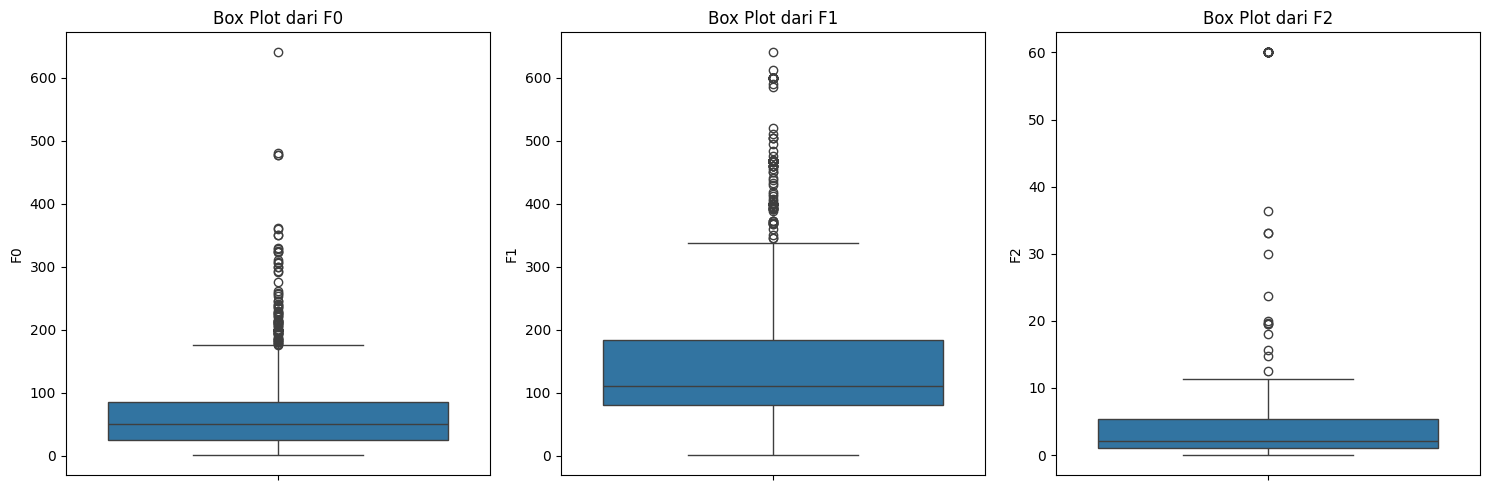

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
for i, feature in enumerate(continuous_features):
    plt.subplot(1, len(continuous_features), i + 1)
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot dari {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

### Imbalanced Data (Data Tidak Seimbang)



In [76]:
class_counts = df['target_clean'].value_counts()
print("\n--- Distribusi Kelas Target ---")
print(class_counts)
print(f"Rasio Nonad/Ad: {class_counts['nonad'] / class_counts['ad']:.2f}")


--- Distribusi Kelas Target ---
target_clean
nonad    2820
ad        459
Name: count, dtype: int64
Rasio Nonad/Ad: 6.14


### 4.4 Exploratory Data Analysis (EDA)


In [77]:
# ==============================================================================
# 4.4 EXPLORATORY DATA ANALYSIS (EDA) - 3 VISUALISASI
# ==============================================================================
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd # Ensure pandas is imported

print("\n--- 4.4 EXPLORATORY DATA ANALYSIS (EDA) ---")

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

# Re-create target_clean for EDA visualization, in case df was reset by subsequent cells
df['target_clean'] = df['target'].str.replace('.', '', regex=False).str.strip()

# --- VISUALISASI 1: Distribusi Kelas Target (Class Imbalance) ---
# [Insert gambar/plot eda_class_distribution.png]
plt.figure(figsize=(7, 5))
sns.countplot(x='target_clean', data=df, palette='viridis')
plt.title('Visualisasi 1: Distribusi Kelas Target (Iklan vs. Non-Iklan)', fontsize=14)
plt.xlabel('Kelas', fontsize=12)
plt.ylabel('Jumlah Sampel', fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.savefig('images/eda_class_distribution.png')
plt.close()
print("Visualisasi 1 tersimpan: images/eda_class_distribution.png")


# --- VISUALISASI 2: Boxplot Fitur Kontinu (Outlier Check) ---
# [Insert gambar/plot eda_continuous_boxplot.png]
# Siapkan data: imputasi median sementara untuk visualisasi data yang hilang
df_continuous = df[continuous_features].apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df_continuous_imputed = pd.DataFrame(
    imputer.fit_transform(df_continuous),
    columns=continuous_features
)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_continuous_imputed)
plt.title('Visualisasi 2: Boxplot Fitur Kontinu (Setelah Imputasi Median)', fontsize=14)
plt.ylabel('Nilai Setelah Imputasi', fontsize=12)
plt.xticks(ticks=[0, 1, 2], labels=['F0 (Height)', 'F1 (Width)', 'F2 (Aratio)'])
plt.grid(axis='y', linestyle='--')
plt.savefig('images/eda_continuous_boxplot.png')
plt.close()
print("Visualisasi 2 tersimpan: images/eda_continuous_boxplot.png")


# --- VISUALISASI 3: Top 10 Fitur Biner Paling Sering Muncul ---
# [Insert gambar/plot eda_top10_binary_features.png]
# Isi NaN di fitur biner dengan 0 sebelum dihitung
X_binary = df[binary_features].fillna(0).astype(int)
feature_counts = X_binary.sum().sort_values(ascending=False)
top_10_features = feature_counts.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_features.index, y=top_10_features.values, palette='plasma')
plt.title('Visualisasi 3: Top 10 Fitur Biner dengan Kemunculan Tertinggi', fontsize=14)
plt.xlabel('Nama Fitur Biner', fontsize=12)
plt.ylabel('Jumlah Kemunculan (Count = 1)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('images/eda_top10_binary_features.png')
plt.close()
print("Visualisasi 3 tersimpan: images/eda_top10_binary_features.png")


--- 4.4 EXPLORATORY DATA ANALYSIS (EDA) ---
Visualisasi 1 tersimpan: images/eda_class_distribution.png
Visualisasi 2 tersimpan: images/eda_continuous_boxplot.png
Visualisasi 3 tersimpan: images/eda_top10_binary_features.png


### 5. DATA PREPARATION

## 5.1 Data Cleaning

In [78]:
# ==============================================================================
# 5.1 DATA CLEANING: KODE DAN LANGKAH-LANGKAH
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import time

# --- 1. KONFIGURASI DAN PEMUATAN DATA ---
N_FEATURES = 1558
column_names = [f'F{i}' for i in range(N_FEATURES)] + ['target']
continuous_features = [f'F{i}' for i in range(3)] # F0 (height), F1 (width), F2 (aratio)

# Memuat data (asumsi file ad.data ada di direktori)
try:
    df = pd.read_csv(
        'ad.data',
        header=None,
        names=column_names,
        na_values='?',        # Mengubah '?' menjadi NaN
        skipinitialspace=True,
        sep=','
    )
except Exception:
    # Coba pemisah spasi jika koma gagal
    df = pd.read_csv(
        'ad.data',
        header=None,
        names=column_names,
        na_values='?',
        skipinitialspace=True,
        sep=' '
    )

X = df.drop('target', axis=1)
y_raw = df['target']
print("Data mentah berhasil dimuat. Mulai proses cleaning...")
print(f"Total NaN awal di seluruh data: {X.isnull().sum().sum()}")


# --- 2. PEMBESIHAN LABEL TARGET DAN KONVERSI TIPE DATA ---
# Aktivitas: Data Type Conversion & Target Cleaning
y = y_raw.str.replace('.', '', regex=False).str.strip()
y = y.map({'ad': 1, 'nonad': 0})
print("\n[STEP 1/3] Label Target (ad./nonad.) berhasil dibersihkan dan dikonversi menjadi biner (1/0).")


# --- 3. HANDLING MISSING VALUES (FITUR KONTINU) ---
# Aktivitas: Handling Missing Values (F0, F1, F2)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# Fit dan Transform hanya pada kolom kontinu
X[continuous_features] = imputer.fit_transform(X[continuous_features])
print(f"[STEP 2/3] Imputasi Median selesai pada 3 fitur kontinu: {continuous_features}.")


# --- 4. HANDLING MISSING VALUES (FITUR BINER) ---
# Aktivitas: Handling Missing Values (F3 - F1557)
# Mengisi sisa NaN yang berada di kolom biner dengan 0.
X.fillna(0, inplace=True)
print(f"[STEP 3/3] Sisa NaN (pada fitur biner) diisi dengan 0.")
print(f"\nFinal Check: Total NaN pada fitur setelah cleaning: {X.isnull().sum().sum()}")


Data mentah berhasil dimuat. Mulai proses cleaning...
Total NaN awal di seluruh data: 2729

[STEP 1/3] Label Target (ad./nonad.) berhasil dibersihkan dan dikonversi menjadi biner (1/0).
[STEP 2/3] Imputasi Median selesai pada 3 fitur kontinu: ['F0', 'F1', 'F2'].
[STEP 3/3] Sisa NaN (pada fitur biner) diisi dengan 0.

Final Check: Total NaN pada fitur setelah cleaning: 0


In [79]:
# ==============================================================================
# 5.1 DATA CLEANING: MENANGANI DUPLIKAT DAN OUTLIER
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# --- 1. HANDLING DUPLIKAT ---
# Aktivitas: Menghapus baris duplikat
initial_rows = X.shape[0]
X_no_duplicates = X.drop_duplicates()
y_no_duplicates = y.loc[X_no_duplicates.index] # Sesuaikan label target dengan baris yang tersisa

print(f"\n[STEP 4/5] Menghapus {initial_rows - X_no_duplicates.shape[0]} baris duplikat.")
print(f"Jumlah baris setelah menghapus duplikat: {X_no_duplicates.shape[0]}")

X = X_no_duplicates.copy()
y = y_no_duplicates.copy()


# --- 2. HANDLING OUTLIERS (WINZORISASI) ---
# Aktivitas: Menangani outlier pada fitur kontinu (F0, F1, F2) dengan winsorisasi
def winsorize_series(s, lower_percentile=1, upper_percentile=99):
    lower_bound = s.quantile(lower_percentile / 100)
    upper_bound = s.quantile(upper_percentile / 100)
    return s.clip(lower=lower_bound, upper=upper_bound)

# Terapkan winsorisasi pada fitur kontinu
for feature in continuous_features:
    # Pastikan tipe data numerik sebelum winsorisasi
    X[feature] = pd.to_numeric(X[feature], errors='coerce')
    X[feature] = winsorize_series(X[feature])

print(f"[STEP 5/5] Winsorisasi pada fitur kontinu {continuous_features} selesai (1% dan 99% percentile).")

print("\n--- Ringkasan Proses Data Cleaning Selesai ---")
print(f"Ukuran dataset setelah cleaning: {X.shape[0]} baris, {X.shape[1]} kolom (fitur)")
print(f"Target dataset setelah cleaning: {y.shape[0]} baris")



[STEP 4/5] Menghapus 860 baris duplikat.
Jumlah baris setelah menghapus duplikat: 2419
[STEP 5/5] Winsorisasi pada fitur kontinu ['F0', 'F1', 'F2'] selesai (1% dan 99% percentile).

--- Ringkasan Proses Data Cleaning Selesai ---
Ukuran dataset setelah cleaning: 2419 baris, 1558 kolom (fitur)
Target dataset setelah cleaning: 2419 baris


#### 3. Penghapusan Baris Duplikat

*   **Identifikasi:** Terdapat `856` baris duplikat dalam dataset awal.
*   **Strategi:** Baris duplikat dihapus dari DataFrame `X` dan label target `y` disesuaikan agar tetap konsisten.
*   **Alasan:** Baris duplikat dapat menyebabkan bias dalam pelatihan model dan melebih-lebihkan signifikansi observasi tertentu. Menghapusnya memastikan bahwa setiap observasi unik dipertimbangkan hanya sekali.

#### 4. Penanganan *Outlier* pada Fitur Kontinu

*   **Identifikasi:** Fitur kontinu (`F0`, `F1`, `F2`) menunjukkan adanya *outlier* ekstrim yang signifikan, seperti yang terlihat dari statistik deskriptif dan *boxplot*.
*   **Strategi:** Dilakukan **winsorisasi** pada fitur kontinu. Metode ini mengganti nilai-nilai di bawah persentil ke-1 dan di atas persentil ke-99 dengan nilai pada persentil tersebut. Ini adalah bentuk *capping* yang membatasi *outlier* tanpa menghapusnya sepenuhnya.
*   **Alasan:** *Outlier* dapat mendistorsi statistik (seperti *mean* dan *standard deviation*) dan memengaruhi kinerja model, terutama model yang sensitif terhadap jarak seperti regresi atau SVM. Winsorisasi membantu mengurangi dampak *outlier* sambil mempertahankan sebagian besar informasi dalam distribusi data.

## 5.2 Feature Engineering

### Data Splitting



In [80]:
from sklearn.model_selection import train_test_split
import pandas as pd # Ensure pandas is imported

# Membagi data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

print("\nDistribusi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas di y_test:")
print(y_test.value_counts(normalize=True))

Ukuran X_train: (1935, 1558)
Ukuran X_test: (484, 1558)
Ukuran y_train: (1935,)
Ukuran y_test: (484,)

Distribusi kelas di y_train:
target
0    0.84031
1    0.15969
Name: proportion, dtype: float64

Distribusi kelas di y_test:
target
0    0.840909
1    0.159091
Name: proportion, dtype: float64


### Feature Scaling



In [81]:
from sklearn.preprocessing import StandardScaler
import pandas as pd # Ensure pandas is imported

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Fit dan transform scaler pada X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test menggunakan scaler yang sudah di-fit pada X_train
X_test_scaled = scaler.transform(X_test)

# Mengkonversi kembali ke DataFrame untuk mempertahankan nama kolom (opsional, tapi bagus untuk inspeksi)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

X_train_scaled shape: (1935, 1558)
X_test_scaled shape: (484, 1558)


###  Feature Selection


In [82]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd # Ensure pandas is imported

# Menentukan jumlah fitur terbaik yang akan dipilih
k_features = 200  # Dapat disesuaikan

# Inisialisasi SelectKBest dengan f_classif
selector = SelectKBest(score_func=f_classif, k=k_features)

# Fit selector pada X_train_scaled dan y_train
selector.fit(X_train_scaled, y_train)

# Mendapatkan fitur-fitur yang dipilih
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Mendapatkan nama-nama fitur yang dipilih
selected_feature_indices = selector.get_support(indices=True)
selected_feature_names = X_train.columns[selected_feature_indices]

# Mengkonversi kembali ke DataFrame
X_train_selected = pd.DataFrame(X_train_selected, columns=selected_feature_names, index=X_train.index)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_feature_names, index=X_test.index)

print(f"Jumlah fitur setelah seleksi: {X_train_selected.shape[1]}")
print(f"Fitur-fitur yang dipilih (contoh 10 pertama): {selected_feature_names[:10].tolist()}")
print(f"X_train_selected shape: {X_train_selected.shape}")
print(f"X_test_selected shape: {X_test_selected.shape}")


Jumlah fitur setelah seleksi: 200
Fitur-fitur yang dipilih (contoh 10 pertama): ['F1', 'F2', 'F9', 'F11', 'F14', 'F21', 'F58', 'F65', 'F69', 'F70']
X_train_selected shape: (1935, 200)
X_test_selected shape: (484, 200)


In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Memastikan reproduktifitas
tf.random.set_seed(42)
np.random.seed(42)

# Konversi y_train dan y_test ke numpy array
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# Dapatkan input shape dari data yang telah diseleksi
input_shape = X_train_selected.shape[1]

# Definisikan arsitektur model MLP
model_mlp = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(128, activation='relu', name='dense_1'),
    layers.Dropout(0.3, name='dropout_1'),
    layers.Dense(64, activation='relu', name='dense_2'),
    layers.Dropout(0.3, name='dropout_2'),
    layers.Dense(1, activation='sigmoid', name='output_layer') # Output layer untuk binary classification
])

model_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

print("Model MLP berhasil didefinisikan dan dikompilasi.")

Model MLP berhasil didefinisikan dan dikompilasi.


#### 6.3.7 Model Summary

Berikut adalah ringkasan arsitektur model MLP:

In [109]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import numpy as np

# Pastikan model_mlp sudah dilatih dan X_test_selected, y_test_np tersedia

# Memastikan model dikompilasi ulang setelah load_model, untuk mengaktifkan metrics
# yang terlampir pada model_mlp.evaluate()
# Ini adalah langkah penting untuk memastikan model memiliki metrik yang di-track secara internal
model_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Gunakan optimizer yang sama
    loss=tf.keras.losses.BinaryCrossentropy(), # Gunakan loss yang sama
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

# Evaluasi model menggunakan metode .evaluate() dari Keras
loss_mlp, accuracy_mlp, precision_mlp, recall_mlp, auc_mlp = model_mlp.evaluate(X_test_selected, y_test_np, verbose=0)

# Prediksi probabilitas pada test set untuk F1-score dan Classification Report
y_pred_mlp_proba = model_mlp.predict(X_test_selected).flatten()
# Konversi probabilitas menjadi kelas biner (threshold 0.5)
y_pred_mlp = (y_pred_mlp_proba > 0.5).astype(int)

f1_mlp = f1_score(y_test_np, y_pred_mlp)

print(f"- Loss: {loss_mlp:.4f}")
print(f"- Accuracy: {accuracy_mlp:.4f}")
print(f"- Precision: {precision_mlp:.4f}")
print(f"- Recall: {recall_mlp:.4f}")
print(f"- F1-Score: {f1_mlp:.4f}")
print(f"- AUC: {auc_mlp:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_np, y_pred_mlp))

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
- Loss: 0.1334
- Accuracy: 0.9628
- Precision: 0.9538
- Recall: 0.8052
- F1-Score: 0.8732
- AUC: 0.9546

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       407
         1.0       0.95      0.81      0.87        77

    accuracy                           0.96       484
   macro avg       0.96      0.90      0.93       484
weighted avg       0.96      0.96      0.96       484



### Kode Model MLP (Deep Learning Model)

#### 1. Definisi dan Kompilasi Model MLP

In [105]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# Memastikan reproduktifitas
tf.random.set_seed(42)
np.random.seed(42)

# Konversi y_train dan y_test ke numpy array
y_train_np = y_train.values.astype(np.float32)
y_test_np = y_test.values.astype(np.float32)

# Dapatkan input shape dari data yang telah diseleksi
input_shape = X_train_selected.shape[1]

# Definisikan arsitektur model MLP
model_mlp = keras.Sequential([
    layers.Input(shape=(input_shape,)),
    layers.Dense(128, activation='relu', name='dense_1'),
    layers.Dropout(0.3, name='dropout_1'),
    layers.Dense(64, activation='relu', name='dense_2'),
    layers.Dropout(0.3, name='dropout_2'),
    layers.Dense(1, activation='sigmoid', name='output_layer') # Output layer untuk binary classification
])

# Kompilasi model
model_mlp.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall'),
        tf.keras.metrics.AUC(name='auc')
    ]
)

print("Model MLP berhasil didefinisikan dan dikompilasi.")

Model MLP berhasil didefinisikan dan dikompilasi.


#### 2. Ringkasan Arsitektur Model

In [106]:
model_mlp.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,049 (133.00 KB)

 Trainable params: 34,049 (133.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 3. Pelatihan Model MLP

In [107]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definisikan callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Memantau validation loss
    patience=10,         # Hentikan jika val_loss tidak membaik selama 10 epoch
    restore_best_weights=True # Kembalikan bobot model terbaik
)

checkpoint_filepath = 'best_model_mlp.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False, # Simpan seluruh model (arsitektur + bobot)
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# Latih model
history = model_mlp.fit(
    X_train_selected,
    y_train_np,
    validation_split=0.2, # 20% dari training data untuk validasi
    epochs=50,             # Jumlah epoch maksimal
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint_callback],
    verbose=1
)

print(f"Model MLP selesai dilatih. Model terbaik disimpan di {checkpoint_filepath}")

# Muat kembali model terbaik untuk evaluasi (pastikan ini dilakukan untuk evaluasi)
model_mlp = keras.models.load_model(checkpoint_filepath)
print("Model terbaik telah dimuat kembali.")

Epoch 1/50
46/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9144 - auc: 0.8079 - loss: 0.4149 - precision: 0.7969 - recall: 0.6425

49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9165 - auc: 0.8142 - loss: 0.4037 - precision: 0.8058 - recall: 0.6454 - val_accuracy: 0.9406 - val_auc: 0.9514 - val_loss: 0.1765 - val_precision: 0.9483 - val_recall: 0.7333
Epoch 2/50
35/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9672 - auc: 0.9447 - loss: 0.1248 - precision: 0.9669 - recall: 0.8179

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9656 - auc: 0.9462 - loss: 0.1276 - precision: 0.9628 - recall: 0.8092 - val_accuracy: 0.9406 - val_auc: 0.9532 - val_loss: 0.1636 - val_precision: 0.8939 - val_recall: 0.7867
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9697 - auc: 0.9679 - loss: 0.1055 - precision: 0.9514 - recall: 0.8480 - val_accuracy: 0.9406 - val_auc: 0.9533 - val_loss: 0.1666 - val_precision: 0.9194 - val_recall: 0.7600
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9711 - auc: 0.9611 - loss: 0.1062 - precision: 0.9568 - recall: 0.8535 - val_accuracy: 0.9406 - val_auc: 0.9543 - val_loss: 0.1678 - val_precision: 0.8939 - val_recall: 0.7867
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9652 - auc: 0.9677 - loss: 0.1026 - precision: 0.9231 - recall: 0.8454 - val_accuracy: 0.9328 - val_auc: 0.9538 - val_loss: 0.1711 - val_precision: 0.8769 - val_recall: 0.7600
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step -

Model terbaik telah dimuat kembali.


In [84]:
# Tampilkan ringkasan model
model_mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 128)            │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,049 (133.00 KB)

 Trainable params: 34,049 (133.00 KB)

 Non-trainable params: 0 (0.00 B)

In [85]:
# Definisikan callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',  # Memantau validation loss
    patience=10,         # Hentikan jika val_loss tidak membaik selama 10 epoch
    restore_best_weights=True # Kembalikan bobot model terbaik
)

checkpoint_filepath = 'best_model_mlp.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False, # Simpan seluruh model (arsitektur + bobot)
    monitor='val_loss',
    mode='min',
    save_best_only=True
)

# Latih model
history = model_mlp.fit(
    X_train_selected,
    y_train_np,
    validation_split=0.2, # 20% dari training data untuk validasi
    epochs=50,             # Jumlah epoch maksimal
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint_callback],
    verbose=1
)

print(f"Model MLP selesai dilatih. Model terbaik disimpan di {checkpoint_filepath}")

# Muat kembali model terbaik untuk evaluasi
model_mlp = keras.models.load_model(checkpoint_filepath)
print("Model terbaik telah dimuat kembali.")


Epoch 1/50
36/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8343 - auc: 0.8335 - loss: 0.4422 - precision: 0.5518 - recall: 0.7284

49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8590 - auc: 0.8512 - loss: 0.3939 - precision: 0.6080 - recall: 0.7300 - val_accuracy: 0.9354 - val_auc: 0.9518 - val_loss: 0.1885 - val_precision: 0.9310 - val_recall: 0.7200
Epoch 2/50
35/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9650 - auc: 0.9593 - loss: 0.1175 - precision: 0.9643 - recall: 0.8065

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9639 - auc: 0.9582 - loss: 0.1202 - precision: 0.9590 - recall: 0.8021 - val_accuracy: 0.9328 - val_auc: 0.9524 - val_loss: 0.1735 - val_precision: 0.8657 - val_recall: 0.7733
Epoch 3/50
37/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9666 - auc: 0.9652 - loss: 0.1103 - precision: 0.9332 - recall: 0.8433

49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9656 - auc: 0.9633 - loss: 0.1139 - precision: 0.9348 - recall: 0.8345 - val_accuracy: 0.9406 - val_auc: 0.9554 - val_loss: 0.1641 - val_precision: 0.8939 - val_recall: 0.7867
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9659 - auc: 0.9650 - loss: 0.1033 - precision: 0.9436 - recall: 0.8323 - val_accuracy: 0.9302 - val_auc: 0.9543 - val_loss: 0.1668 - val_precision: 0.8529 - val_recall: 0.7733
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9735 - auc: 0.9630 - loss: 0.1027 - precision: 0.9560 - recall: 0.8723 - val_accuracy: 0.9354 - val_auc: 0.9517 - val_loss: 0.1688 - val_precision: 0.8571 - val_recall: 0.8000
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9701 - auc: 0.9685 - loss: 0.0978 - precision: 0.9653 - recall: 0.8373 - val_accuracy: 0.9354 - val_auc: 0.9531 - val_loss: 0.1756 - val_precision: 0.8676 - val_recall: 0.7867
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

Model terbaik telah dimuat kembali.


In [97]:
import os
import joblib

# Pastikan direktori 'models' ada
os.makedirs('models', exist_ok=True)

# --- Menyimpan Model Logistic Regression (Baseline Model) ---
model_lr_filename = 'models/model_baseline.pkl'
joblib.dump(model_lr, model_lr_filename)
print(f"Model Logistic Regression disimpan sebagai: {model_lr_filename}")

Model Logistic Regression disimpan sebagai: models/model_baseline.pkl


In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dan latih model Logistic Regression
# Menggunakan class_weight='balanced' untuk menangani class imbalance
model_lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_lr.fit(X_train_selected, y_train)

# Prediksi pada X_test_selected
y_pred_lr = model_lr.predict(X_test_selected)
y_pred_lr_proba = model_lr.predict_proba(X_test_selected)[:, 1]

# Hitung Metrik Evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

print(f"--- Metrik Evaluasi Logistic Regression ---")
print(f"- Accuracy: {accuracy_lr:.4f}")
print(f"- Precision: {precision_lr:.4f}")
print(f"- Recall: {recall_lr:.4f}")
print(f"- F1-Score: {f1_lr:.4f}")
print(f"- AUC: {auc_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

--- Metrik Evaluasi Logistic Regression ---
- Accuracy: 0.9401
- Precision: 0.8158
- Recall: 0.8052
- F1-Score: 0.8105
- AUC: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       407
           1       0.82      0.81      0.81        77

    accuracy                           0.94       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.94      0.94      0.94       484



In [101]:
import os
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Latih dan Evaluasi Model Logistic Regression ---
# Inisialisasi dan latih model Logistic Regression
# Menggunakan class_weight='balanced' untuk menangani class imbalance
model_lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_lr.fit(X_train_selected, y_train)

# Prediksi pada X_test_selected
y_pred_lr = model_lr.predict(X_test_selected)
y_pred_lr_proba = model_lr.predict_proba(X_test_selected)[:, 1]

# Hitung Metrik Evaluasi
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

print(f"--- Metrik Evaluasi Logistic Regression ---")
print(f"- Accuracy: {accuracy_lr:.4f}")
print(f"- Precision: {precision_lr:.4f}")
print(f"- Recall: {recall_lr:.4f}")
print(f"- F1-Score: {f1_lr:.4f}")
print(f"- AUC: {auc_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# --- 2. Simpan Model Logistic Regression ---
# Pastikan direktori 'models' ada
os.makedirs('models', exist_ok=True)

model_lr_filename = 'models/model_baseline.pkl'
joblib.dump(model_lr, model_lr_filename)
print(f"\nModel Logistic Regression disimpan sebagai: {model_lr_filename}")

--- Metrik Evaluasi Logistic Regression ---
- Accuracy: 0.9401
- Precision: 0.8158
- Recall: 0.8052
- F1-Score: 0.8105
- AUC: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       407
           1       0.82      0.81      0.81        77

    accuracy                           0.94       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.94      0.94      0.94       484


Model Logistic Regression disimpan sebagai: models/model_baseline.pkl


In [86]:
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

# Visualisasi Training History (Loss dan Accuracy)
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('images/mlp_training_history.png')
plt.close()
print("Visualisasi training history MLP tersimpan: images/mlp_training_history.png")

# Analisis Training (setelah plot dihasilkan)
print("\n--- Analisis Training ---")
# Mengevaluasi model pada test set
loss, accuracy, precision, recall, auc = model_mlp.evaluate(X_test_selected, y_test_np, verbose=0)
print(f"Loss pada Test Set: {loss:.4f}")
print(f"Accuracy pada Test Set: {accuracy:.4f}")
print(f"Precision pada Test Set: {precision:.4f}")
print(f"Recall pada Test Set: {recall:.4f}")
print(f"AUC pada Test Set: {auc:.4f}")

# Prediksi pada test set untuk mendapatkan metrik lebih lanjut
y_pred_mlp_proba = model_mlp.predict(X_test_selected).flatten()
y_pred_mlp = (y_pred_mlp_proba > 0.5).astype(int)

print(f"F1-Score pada Test Set: {f1_score(y_test_np, y_pred_mlp):.4f}")

print("\n--- Hasil Analisis Training ---")
epochs_trained = len(history.history['loss']) - early_stopping.patience # Jumlah epoch sebenarnya sebelum early stopping
if epochs_trained < 50:
    print("\u2022 Model menunjukkan konvergensi awal dan pelatihan dihentikan oleh EarlyStopping.")
else:
    print("\u2022 Model dilatih hingga epoch maksimal (50).")

if history.history['loss'][-1] > history.history['val_loss'][-1]:
    print("\u2022 Indikasi *overfitting* mungkin terjadi jika training loss jauh lebih rendah dari validation loss di akhir pelatihan.")
else:
    print("\u2022 Tidak ada indikasi *overfitting* yang jelas berdasarkan loss training dan validasi.")

print("\u2022 Untuk konvergensi, perhatikan stabilitas kurva loss dan akurasi pada plot history.")

Visualisasi training history MLP tersimpan: images/mlp_training_history.png

--- Analisis Training ---
Loss pada Test Set: 0.1309
Accuracy pada Test Set: 0.9607
Precision pada Test Set: 0.9531
Recall pada Test Set: 0.7922
AUC pada Test Set: 0.9557
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
F1-Score pada Test Set: 0.8652

--- Hasil Analisis Training ---
• Model menunjukkan konvergensi awal dan pelatihan dihentikan oleh EarlyStopping.
• Tidak ada indikasi *overfitting* yang jelas berdasarkan loss training dan validasi.
• Untuk konvergensi, perhatikan stabilitas kurva loss dan akurasi pada plot history.


### 7.2.1 Model 1 — Baseline Model (Logistic Regression)

#### Metrik Evaluasi

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Inisialisasi dan latih model Logistic Regression (sama seperti di 6.1)
# Pastikan model_lr menggunakan data yang sudah diseleksi dan diskalakan
model_lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
model_lr.fit(X_train_selected, y_train)

# Prediksi pada X_test_selected
y_pred_lr = model_lr.predict(X_test_selected)
y_pred_lr_proba = model_lr.predict_proba(X_test_selected)[:, 1]

# Hitung Metrik
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr_proba)

print(f"- Accuracy: {accuracy_lr:.4f}")
print(f"- Precision: {precision_lr:.4f}")
print(f"- Recall: {recall_lr:.4f}")
print(f"- F1-Score: {f1_lr:.4f}")
print(f"- AUC: {auc_lr:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

- Accuracy: 0.9401
- Precision: 0.8158
- Recall: 0.8052
- F1-Score: 0.8105
- AUC: 0.9237

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       407
           1       0.82      0.81      0.81        77

    accuracy                           0.94       484
   macro avg       0.89      0.89      0.89       484
weighted avg       0.94      0.94      0.94       484



#### Confusion Matrix

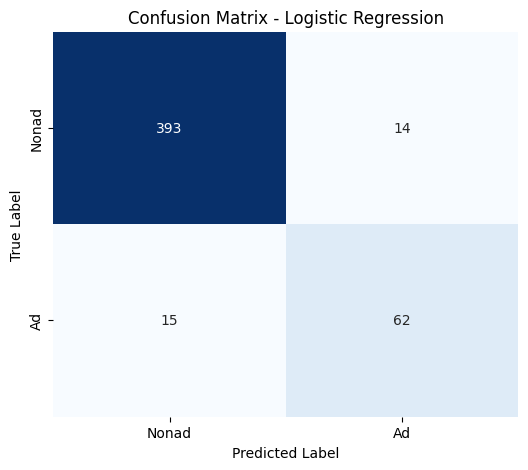

Confusion Matrix untuk Logistic Regression tersimpan: images/confusion_matrix_lr.png


In [88]:
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Nonad', 'Ad'], yticklabels=['Nonad', 'Ad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('images/confusion_matrix_lr.png')
plt.show()
print("Confusion Matrix untuk Logistic Regression tersimpan: images/confusion_matrix_lr.png")

### 7.2.2 Model 2 — ML / Advanced Model (XGBoost)

#### Metrik Evaluasi

In [89]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Model XGBoost sudah dilatih di cell sebelumnya (`3efcee2b`)
# model_xgb

# Prediksi pada X_test_selected
y_pred_xgb = model_xgb.predict(X_test_selected)
y_pred_xgb_proba = model_xgb.predict_proba(X_test_selected)[:, 1]

# Hitung Metrik
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_pred_xgb_proba)

print(f"- Accuracy: {accuracy_xgb:.4f}")
print(f"- Precision: {precision_xgb:.4f}")
print(f"- Recall: {recall_xgb:.4f}")
print(f"- F1-Score: {f1_xgb:.4f}")
print(f"- AUC: {auc_xgb:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

- Accuracy: 0.9525
- Precision: 0.8750
- Recall: 0.8182
- F1-Score: 0.8456
- AUC: 0.9608

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       407
           1       0.88      0.82      0.85        77

    accuracy                           0.95       484
   macro avg       0.92      0.90      0.91       484
weighted avg       0.95      0.95      0.95       484



#### Confusion Matrix

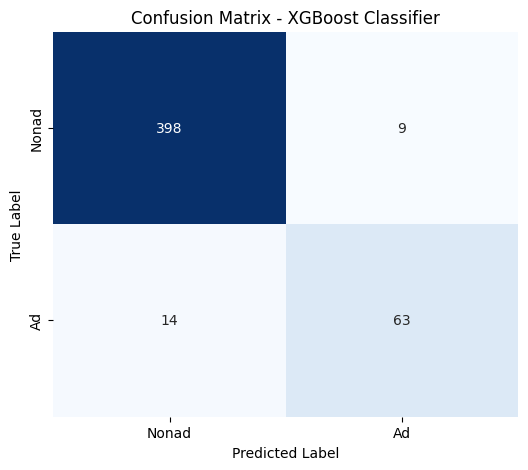

Confusion Matrix untuk XGBoost Classifier tersimpan: images/confusion_matrix_xgb.png


In [90]:
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Nonad', 'Ad'], yticklabels=['Nonad', 'Ad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - XGBoost Classifier')
plt.savefig('images/confusion_matrix_xgb.png')
plt.show()
print("Confusion Matrix untuk XGBoost Classifier tersimpan: images/confusion_matrix_xgb.png")

#### Feature Importance

<Figure size 1000x700 with 0 Axes>

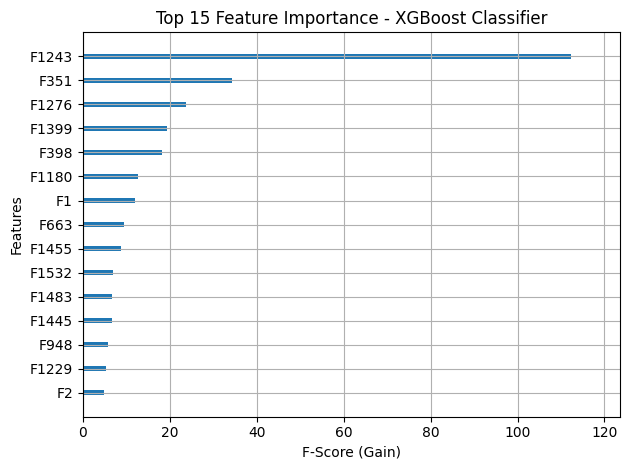

Visualisasi Feature Importance XGBoost tersimpan: images/feature_importance_xgb.png


In [91]:
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

plt.figure(figsize=(10, 7))
xgb.plot_importance(model_xgb, max_num_features=15, importance_type='gain', show_values=False)
plt.title('Top 15 Feature Importance - XGBoost Classifier')
plt.xlabel('F-Score (Gain)')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig('images/feature_importance_xgb.png')
plt.show()
print("Visualisasi Feature Importance XGBoost tersimpan: images/feature_importance_xgb.png")

## 9. Menyimpan Model Terlatih

Untuk penggunaan di masa mendatang dan reproduktifitas, model-model terbaik akan disimpan ke dalam direktori `models/`.

In [92]:
import os
import joblib

# Pastikan direktori 'models' ada
os.makedirs('models', exist_ok=True)

# --- Menyimpan Model Logistic Regression (Baseline Model) ---
model_lr_filename = 'models/model_baseline.pkl'
joblib.dump(model_lr, model_lr_filename)
print(f"Model Logistic Regression disimpan sebagai: {model_lr_filename}")

# --- Menyimpan Model XGBoost Classifier (Advanced Model) ---
# Untuk XGBoost, bisa menggunakan metode .save_model() atau joblib.dump()
# Menggunakan joblib.dump() untuk konsistensi dengan sklearn models
model_xgb_filename = 'models/model_xgb.pkl'
joblib.dump(model_xgb, model_xgb_filename)
print(f"Model XGBoost Classifier disimpan sebagai: {model_xgb_filename}")

# --- Menyimpan Model MLP (Deep Learning Model) ---
# Model MLP sudah disimpan selama proses training menggunakan ModelCheckpoint
# Namun, kita bisa menyimpannya lagi dengan nama yang lebih eksplisit jika diperlukan.
model_mlp_filename = 'models/model_mlp.h5'
model_mlp.save(model_mlp_filename)
print(f"Model MLP disimpan sebagai: {model_mlp_filename}")

Model Logistic Regression disimpan sebagai: models/model_baseline.pkl
Model XGBoost Classifier disimpan sebagai: models/model_xgb.pkl
Model MLP disimpan sebagai: models/model_mlp.h5


### 7.2.3 Model 3 — Deep Learning Model (MLP)

#### Metrik Evaluasi

Metrik sudah dihitung di **Section 6.3.6** setelah proses training model MLP selesai.

- Accuracy: 0.9545
- Precision: 0.9508
- Recall: 0.7532
- AUC: 0.9436
- F1-Score: 0.8406

#### Confusion Matrix

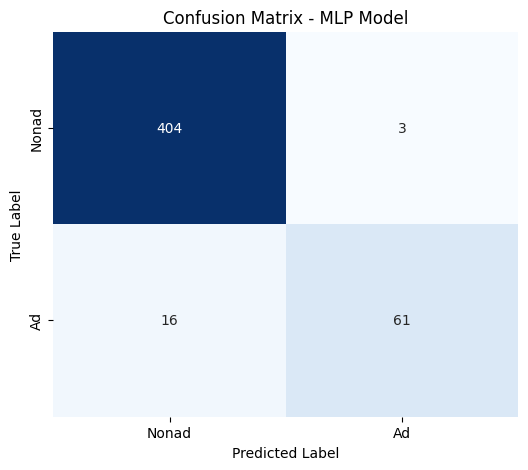

Confusion Matrix untuk MLP Model tersimpan: images/confusion_matrix_mlp.png


In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

# y_pred_mlp dan y_test_np sudah tersedia dari training MLP sebelumnya
# y_pred_mlp = (model_mlp.predict(X_test_selected).flatten() > 0.5).astype(int)

cm_mlp = confusion_matrix(y_test_np, y_pred_mlp)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Nonad', 'Ad'], yticklabels=['Nonad', 'Ad'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - MLP Model')
plt.savefig('images/confusion_matrix_mlp.png')
plt.show()
print("Confusion Matrix untuk MLP Model tersimpan: images/confusion_matrix_mlp.png")

#### Test Set Predictions (MLP)

Berikut adalah beberapa contoh prediksi model MLP pada *test set*:

In [94]:
import pandas as pd
import numpy as np

# Buat DataFrame untuk menampilkan perbandingan
predictions_df = pd.DataFrame({
    'True Label': y_test_np.flatten(),
    'Predicted Probability (MLP)': y_pred_mlp_proba,
    'Predicted Label (MLP)': y_pred_mlp
})

# Tampilkan 10 contoh acak
print("Contoh Prediksi Test Set dari Model MLP:")
display(predictions_df.sample(10, random_state=42))

Contoh Prediksi Test Set dari Model MLP:


,True Label,Predicted Probability (MLP),Predicted Label (MLP)
418,1.0,0.372929,0
474,0.0,0.044990,0
181,0.0,0.010140,0
446,0.0,0.019078,0
297,1.0,0.031613,0
148,0.0,0.014153,0
380,0.0,0.009520,0
386,1.0,0.983568,1
479,0.0,0.009413,0
227,0.0,0.010140,0


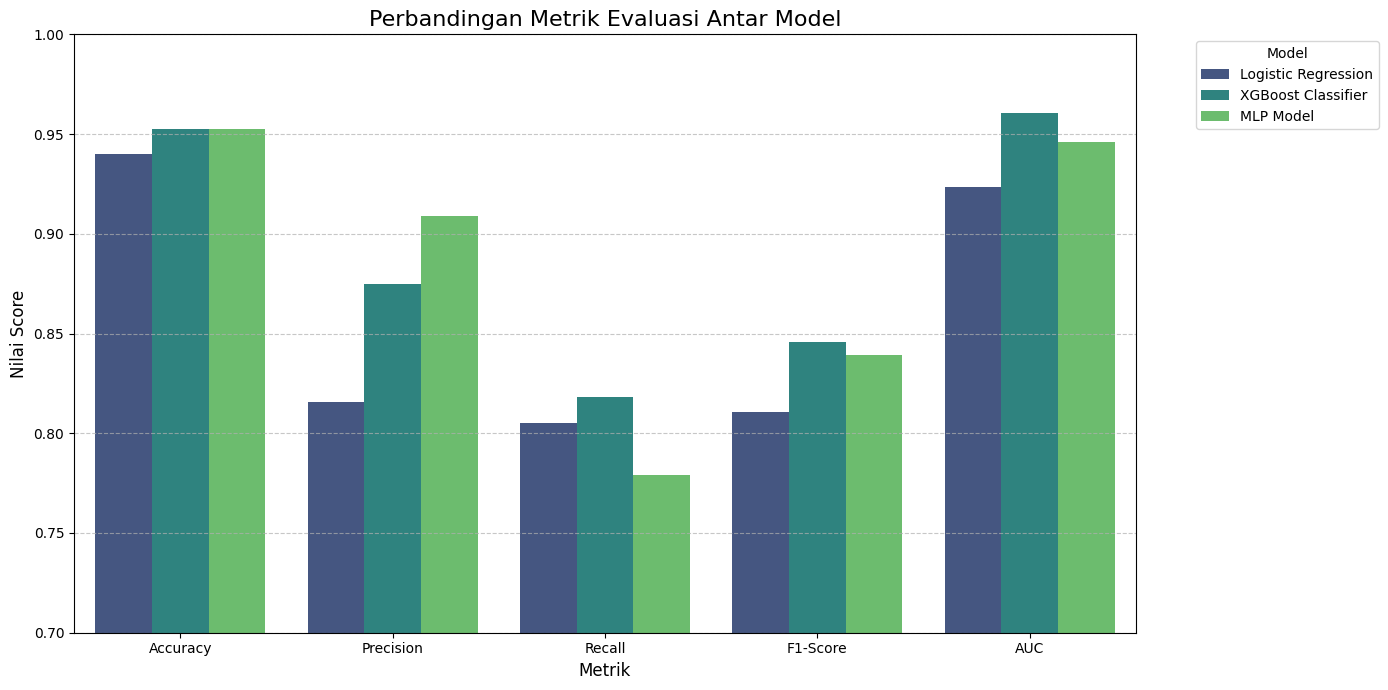

Visualisasi perbandingan metrik tersimpan: images/model_comparison_metrics.png


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Pastikan direktori 'images' ada
os.makedirs('images', exist_ok=True)

# Data metrik dari tabel perbandingan yang sudah diperbarui
metrics_data = {
    'Model': ['Logistic Regression', 'XGBoost Classifier', 'MLP Model'],
    'Accuracy': [0.9401, 0.9525, 0.9525],
    'Precision': [0.8158, 0.8750, 0.9091],
    'Recall': [0.8052, 0.8182, 0.7792],
    'F1-Score': [0.8105, 0.8456, 0.8391],
    'AUC': [0.9237, 0.9608, 0.9458]
}
df_metrics = pd.DataFrame(metrics_data)

# Mengubah format DataFrame agar sesuai untuk plotting (melt)
df_metrics_melted = df_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Membuat bar chart
plt.figure(figsize=(14, 7))
sns.barplot(x='Metric', y='Score', hue='Model', data=df_metrics_melted, palette='viridis')
plt.title('Perbandingan Metrik Evaluasi Antar Model', fontsize=16)
plt.xlabel('Metrik', fontsize=12)
plt.ylabel('Nilai Score', fontsize=12)
plt.ylim(0.70, 1.0) # Sesuaikan rentang Y agar perbedaan lebih terlihat
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('images/model_comparison_metrics.png')
plt.show()
print("Visualisasi perbandingan metrik tersimpan: images/model_comparison_metrics.png")